# QAI Assignment-4

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

# Importing Libraries

In [3]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit.providers.aer.noise import NoiseModel, errors

# A quantum circuit with 3 qubits (1 data qubit and 2 code qubits)

In [6]:
qc.initialize(initial_state, 0)

# The bit-flip error correction code

In [7]:
# Encoding: |0⟩ -> |000⟩, |1⟩ -> |111⟩
qc.cx(0, 1)
qc.cx(0, 2)

# Simulate a bit-flip error on the data qubit

In [8]:
error = errors.depolarizing_error(0.1, 1)
qc.append(error, [0])

# Decoding: Correct the error using the code qubits

In [9]:
qc.cx(0, 1)
qc.cx(0, 2)
qc.ccx(2, 1, 0)

In [10]:
qc.measure([0, 1, 2], [0, 1, 2])

# Simulate the quantum circuit with noise

In [11]:
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(error, 'id')
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, noise_model=noise_model, shots=1024)
result = job.result()
counts = result.get_counts(qc)

# Visualize the results

Counts: {'001': 978, '111': 46}


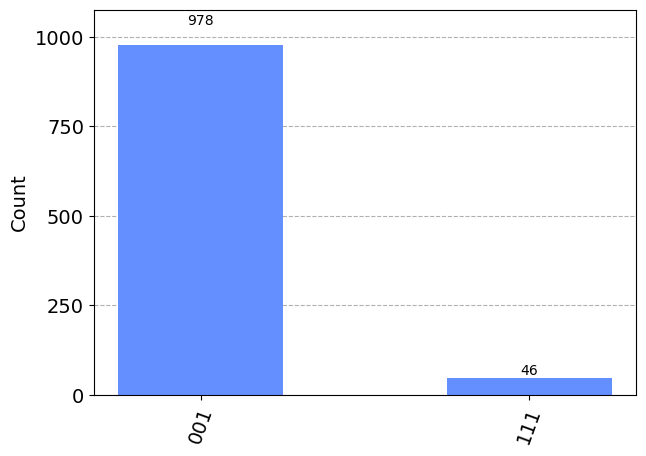

In [12]:
print("Counts:", counts)
plot_histogram(counts)